<a href="https://colab.research.google.com/github/GiX7000/10-machine-learning-algorithms-from-scratch/blob/main/10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of KMeans algorithm

Another very popular unsupervised learning method for clustering is [KMeans](https://www.youtube.com/watch?v=mEGYznC6F9s) algorithm. Each sample is assigned to the cluster to the nearest mean(centroid). For more, see [here](https://www.youtube.com/watch?v=0D4LnsJr85Y&t=1340s).

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## 1. Create a dataset and dive into it.

In [2]:
# make a classification dataset
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

# let's see some things about the data
print(X.shape, y.shape)
print(X.dtype, y.dtype)
print(X[5], y[5])
print(np.unique(y))

# clusters = classes
clusters = len(np.unique(y))
print(clusters)

(500, 2) (500,)
float64 int64
[ 4.93592116 -2.76976569] 1
[0 1 2]
3


So, we have 3 classes/clusters. Let's see them.

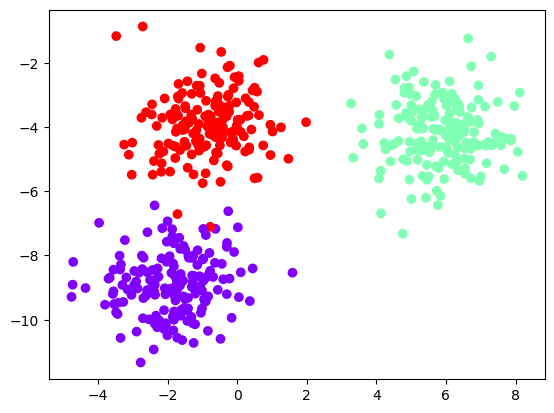

In [3]:
# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow")
plt.show()

## 2. Create a custom KMeans [model](https://www.youtube.com/watch?v=6UF5Ysk_2gk).

In [4]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [5]:
class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

## 3. Use the KMeans model.

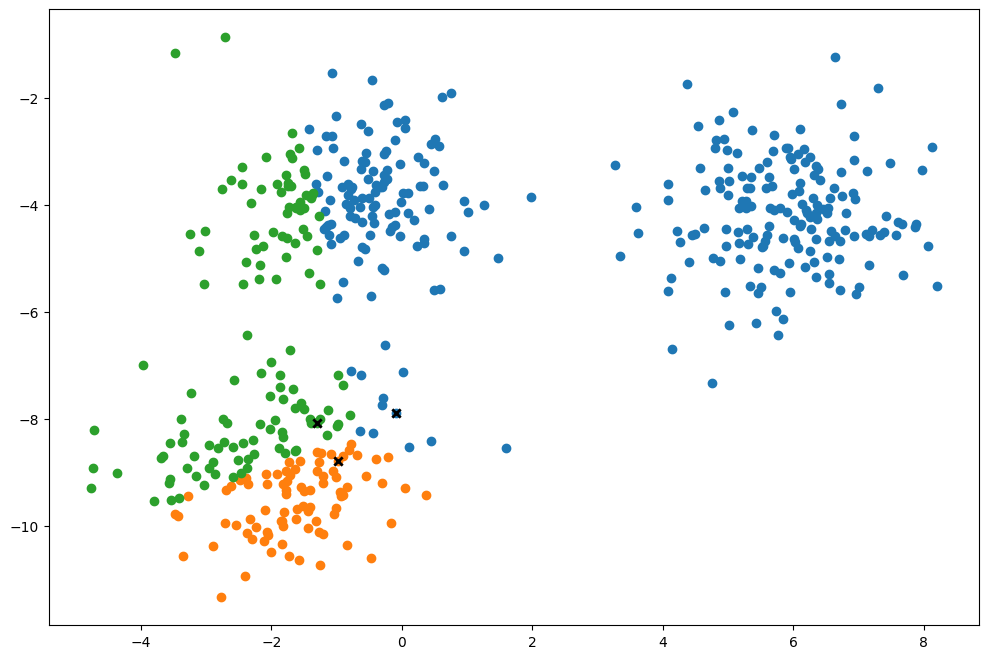

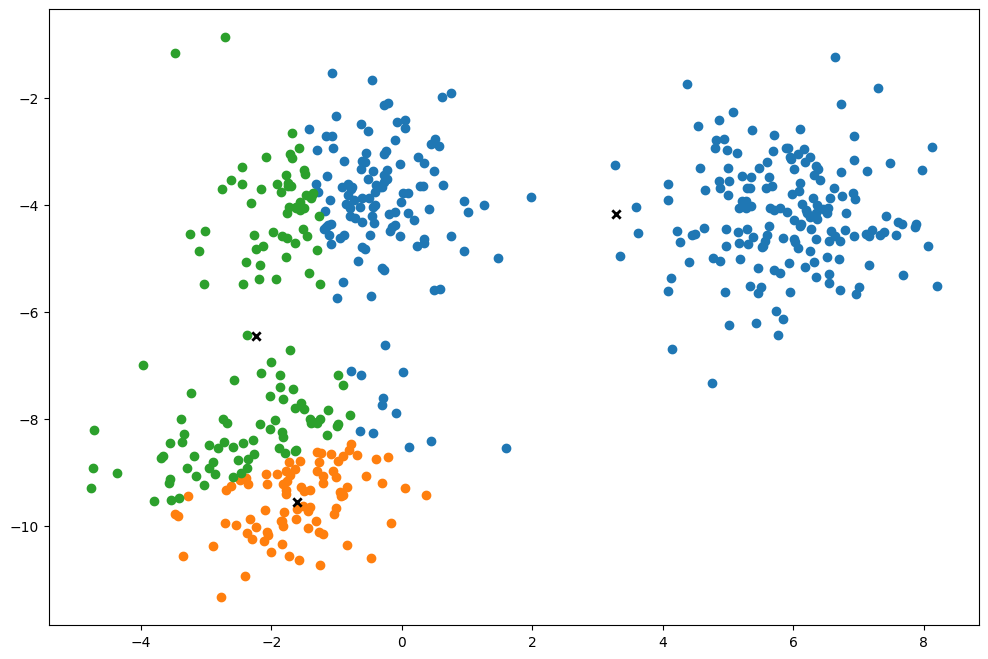

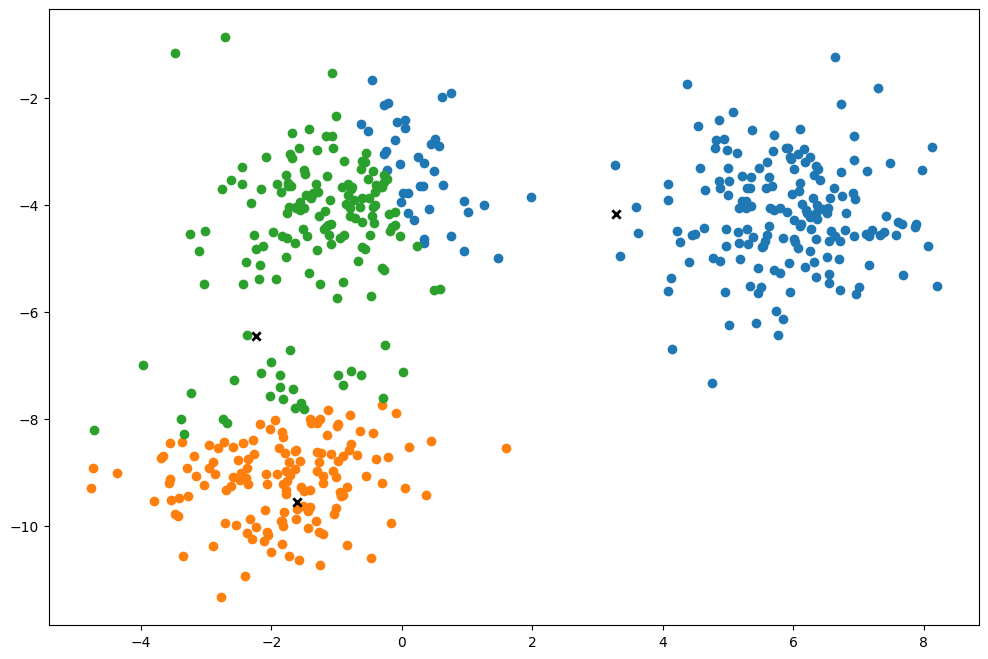

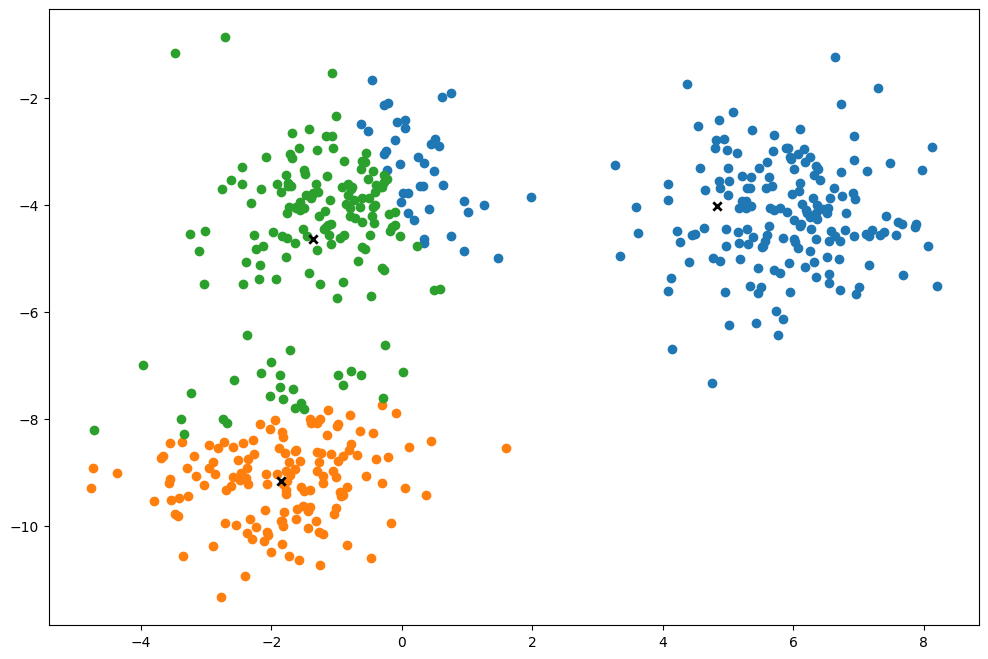

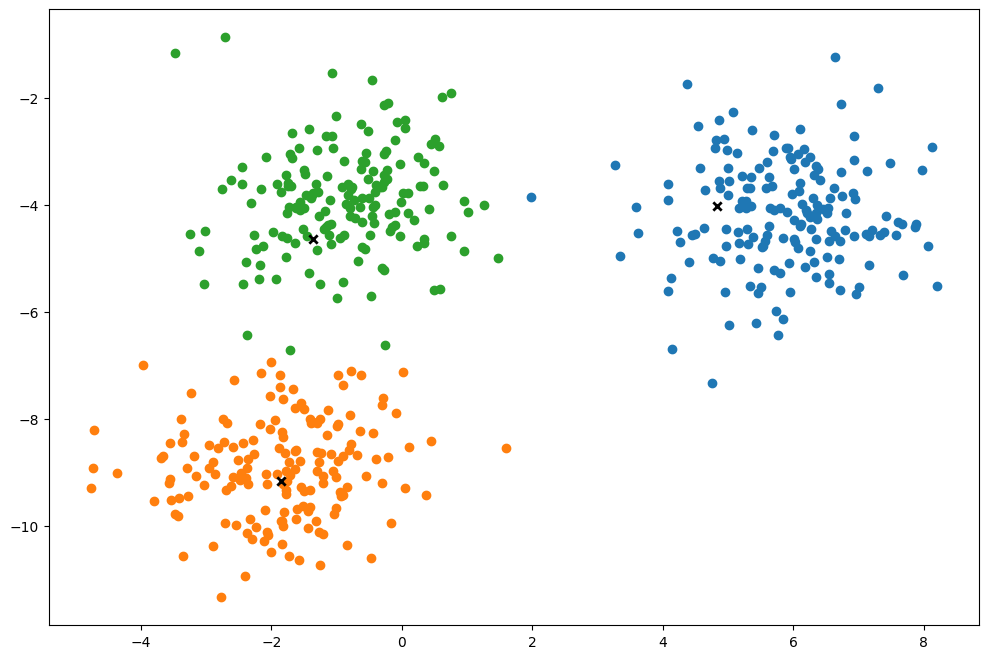

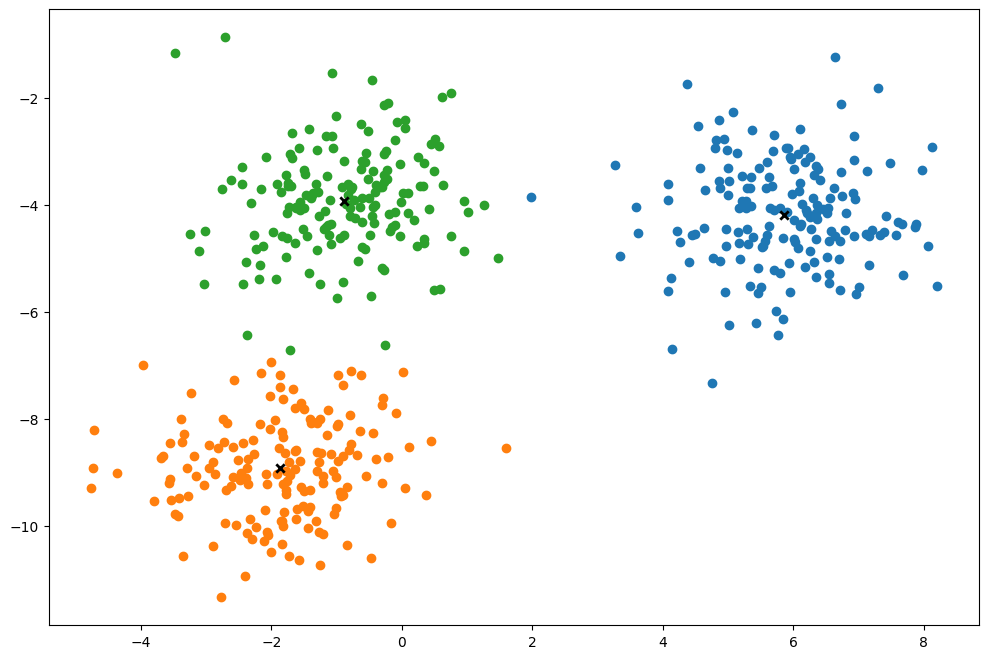

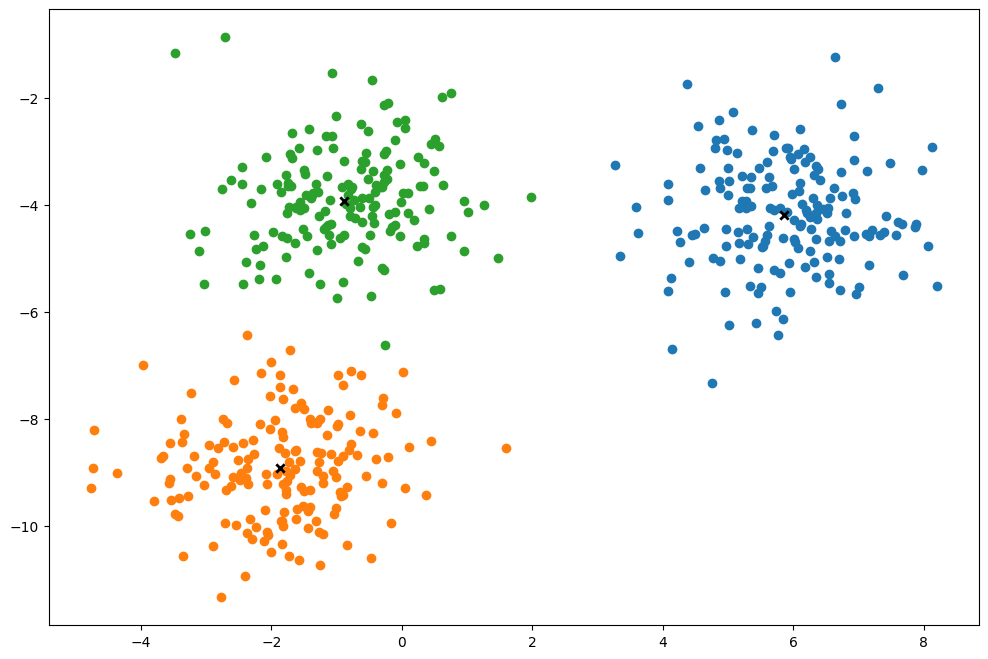

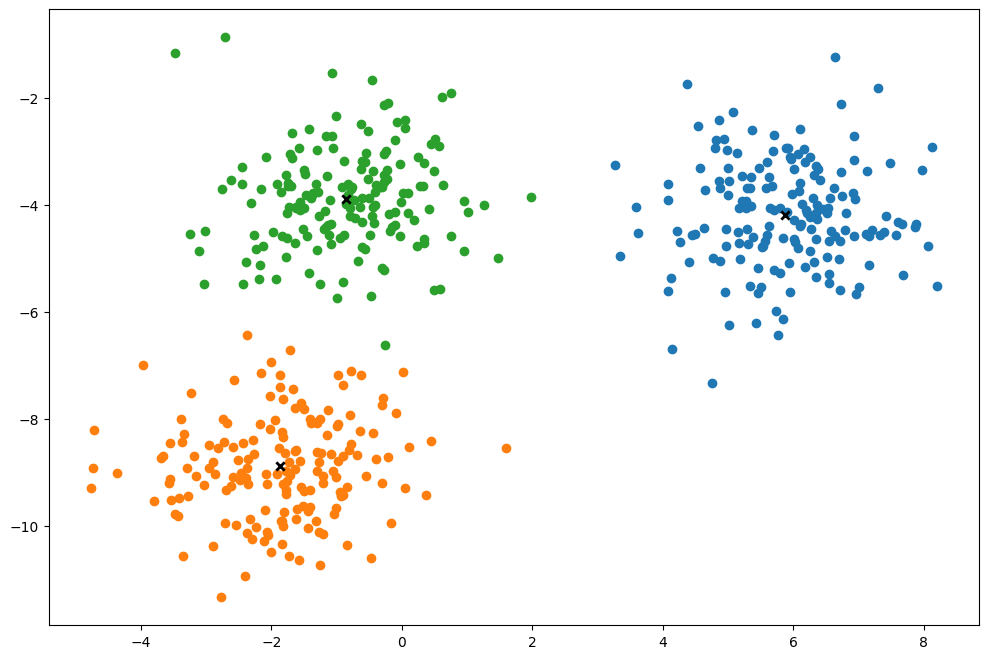

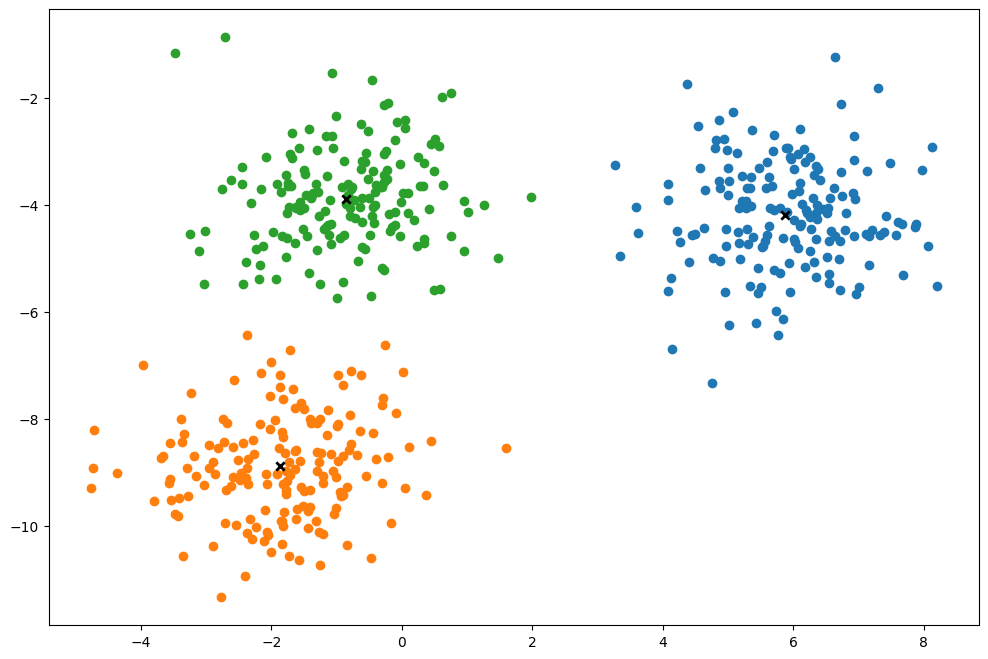

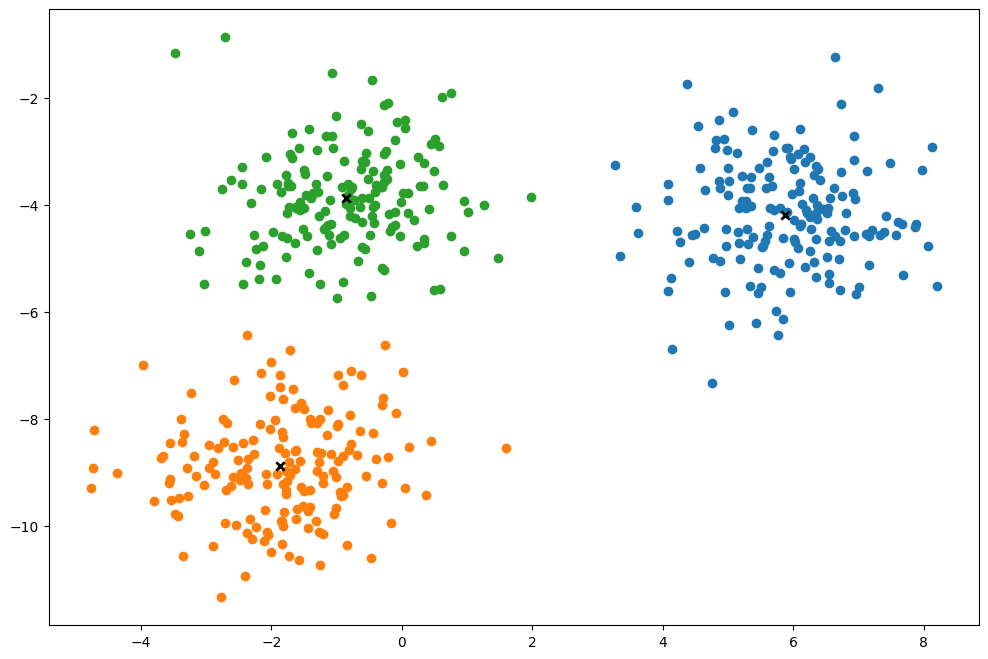

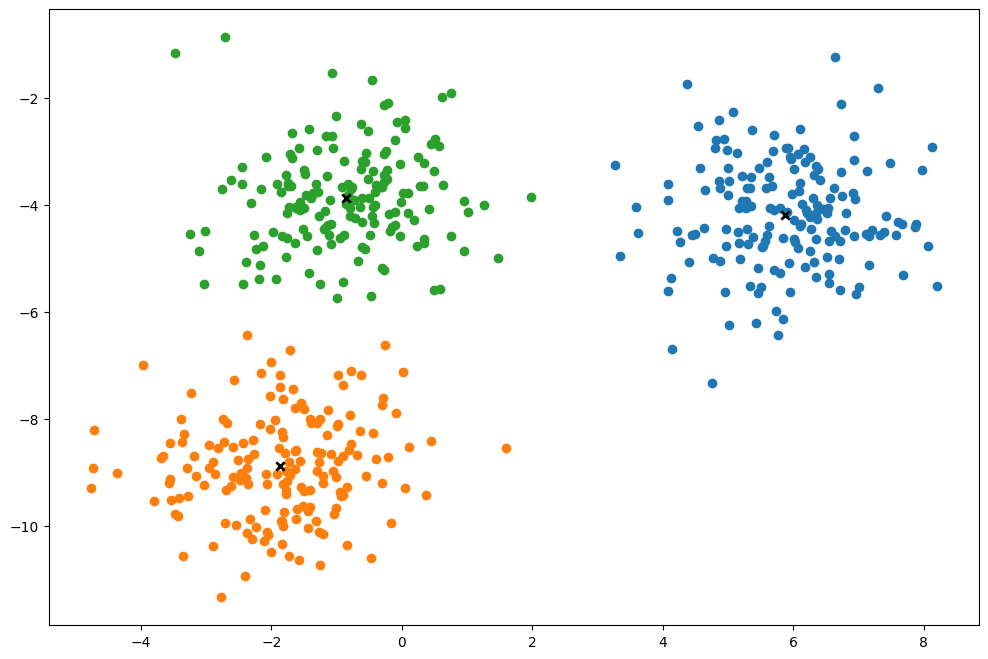

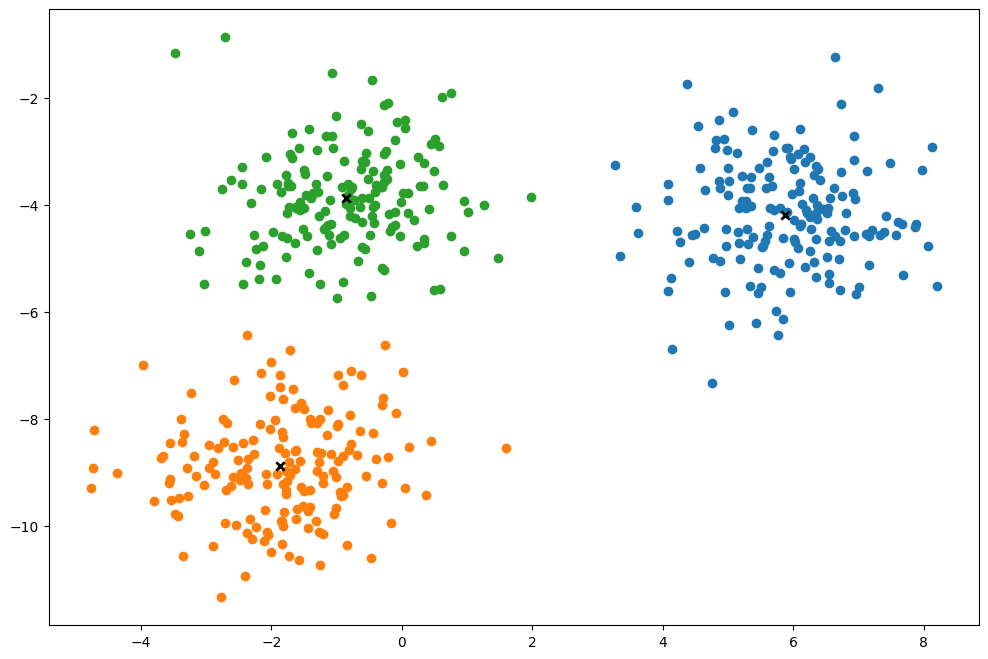

In [6]:
# create ana instance of our classifier
k = KMeans(K=clusters, max_iters=150, plot_steps=True)

# kmeans predictions
y_pred = k.predict(X)

# plot what KMeans did during training
k.plot()

## 4. Compare with the KMeans from scikit-learn library.

Let's see now, what results a [KMeans](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) from scikit-learn library gives us.

In [7]:
# let's compare now with the accuracy that sklearn gives us
from sklearn.cluster import KMeans

# initialize KMeans and fit to the data
kmeans_sklearn = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

# get the cluster labels and centroids
labels = kmeans_sklearn.labels_
centroids = kmeans_sklearn.cluster_centers_

# get the number of centroids
n_centroids = len(centroids)

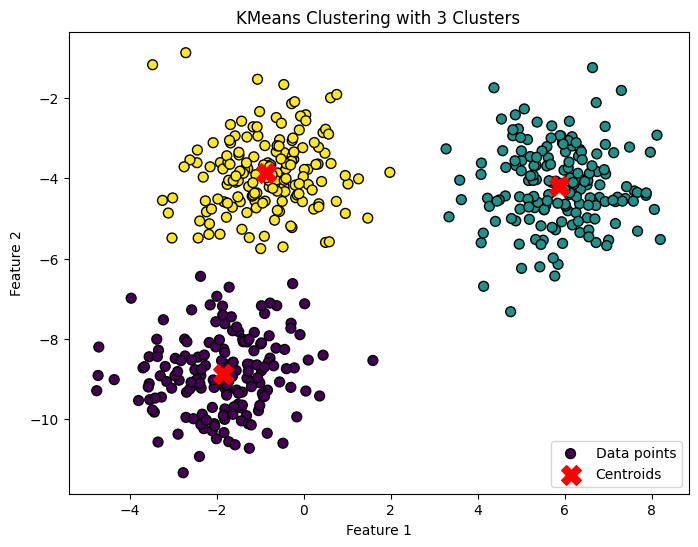

In [8]:
# plot the producted centroids
def plot_kmeans(data, n_clusters, labels, centroids):

    # Plot data points color-coded by cluster
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, label='Data points')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

    # Add title and legend
    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_kmeans(X, n_centroids, labels, centroids)

See KMeans algorithm in action with this very nice [tool](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).